## ---------------------------Vehicle Insurance Prediction Challange------------------------------------

**ABOUT**
* The Vehicle Insurance business is a multi-billion dollar industry. 
  Every year millions and millions of premiums are paid, and a huge amount of claims also pile up. 

* You have to step into the shoes of a data scientist who is building models to help an insurance company understand which claims are worth rejecting and the claims which should be accepted for reimbursement.

**PROBLEM STATEMENT**

**You are given a rich dataset consisting of thousands of rows of past records, which you can use to learn more about your customers’ behaviours. For example, you are supposed to create an ML model to look at a case of an insurance claim and decide whether to reject or accept it.**


* **Columns**: ['ID', 'AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',

                   'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',

                  'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',

                  'DUIS', 'PAST_ACCIDENTS', 'OUTCOME', 'TYPE_OF_VEHICLE']

* Learn and predict the OUTCOME variable.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv(r"D:\Introduction to Python\hackethon\train.csv")
test=pd.read_csv(r"D:\Introduction to Python\hackethon\test.csv")

In [3]:
subm=pd.read_csv(r"D:\Introduction to Python\hackethon\submission.csv")

In [4]:
train.shape,test.shape

((87285, 18), (17715, 17))

In [5]:
df= pd.concat([train, test], ignore_index = True)

In [6]:
df.head()

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,816393,40-64,female,20-29y,university,middle class,0.638050,0,after 2015,0,0,37379,11000,0,0,0,0.0,Sports Car
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1,before 2015,1,0,10238,9000,0,0,0,1.0,HatchBack
2,481952,40-64,male,20-29y,none,middle class,0.839817,1,before 2015,1,1,10238,12000,0,0,0,1.0,Sedan
3,3506,40-64,male,20-29y,high school,upper class,0.682527,1,before 2015,0,1,92099,6000,1,0,0,1.0,Sedan
4,498013,40-64,female,20-29y,none,working class,0.572184,1,after 2015,1,1,32122,15000,0,0,1,0.0,Sedan


In [7]:
# df.AGE.value_counts()
# df.replace(to_replace=['40-64','65+','26-39','16-25'],
#              value=['senior','senior_citizen','middle_age','adult'],inplace=True)

In [8]:
train.shape

(87285, 18)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   105000 non-null  int64  
 1   AGE                  105000 non-null  object 
 2   GENDER               105000 non-null  object 
 3   DRIVING_EXPERIENCE   105000 non-null  object 
 4   EDUCATION            105000 non-null  object 
 5   INCOME               105000 non-null  object 
 6   CREDIT_SCORE         105000 non-null  float64
 7   VEHICLE_OWNERSHIP    105000 non-null  int64  
 8   VEHICLE_YEAR         105000 non-null  object 
 9   MARRIED              105000 non-null  int64  
 10  CHILDREN             105000 non-null  int64  
 11  POSTAL_CODE          105000 non-null  int64  
 12  ANNUAL_MILEAGE       105000 non-null  int64  
 13  SPEEDING_VIOLATIONS  105000 non-null  int64  
 14  DUIS                 105000 non-null  int64  
 15  PAST_ACCIDENTS   

In [10]:
test.shape

(17715, 17)

In [11]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,105000.0,NaN,NaN,NaN,394931.295905,279694.106053,101.0,156351.75,354679.5,598602.25,999976.0
AGE,105000,4,40-64,33716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GENDER,105000,2,male,65317,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DRIVING_EXPERIENCE,105000,4,20-29y,37493,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EDUCATION,105000,3,high school,46590,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INCOME,105000,4,upper class,51271,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CREDIT_SCORE,105000.0,NaN,NaN,NaN,0.602173,0.138045,0.06688,0.514876,0.601112,0.703216,0.954075
VEHICLE_OWNERSHIP,105000.0,NaN,NaN,NaN,0.827038,0.378216,0.0,1.0,1.0,1.0,1.0
VEHICLE_YEAR,105000,2,before 2015,57511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MARRIED,105000.0,NaN,NaN,NaN,0.584143,0.492871,0.0,0.0,1.0,1.0,1.0


In [12]:
# for i in comb.columns:
#     if i in numcols:
#         comb[i] = comb[i].astype(float)
#     else:
#         comb[i]=comb[i].astype(object)

In [13]:
#Target varibale 
df.OUTCOME.value_counts(normalize=True)*100

0.0    57.704073
1.0    42.295927
Name: OUTCOME, dtype: float64

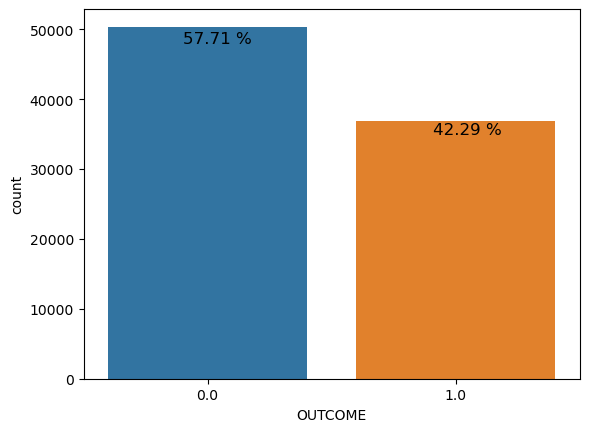

In [14]:
sns.countplot(df.OUTCOME)
plt.text(-0.10,48000,'57.71 %',size=12)
plt.text(0.91,35000,'42.29 %',size=12)
plt.show()

#0 means the insurance claim has to be rejected and 1 means the insurance claim has to be accepted.
#there is not much difference in target variable,so data is supposed to be balance.

In [15]:
## Univariate

In [16]:
# comb.select_dtypes(include=np.number).columns

In [17]:
#numcols=['CREDIT_SCORE', 'ANNUAL_MILEAGE']

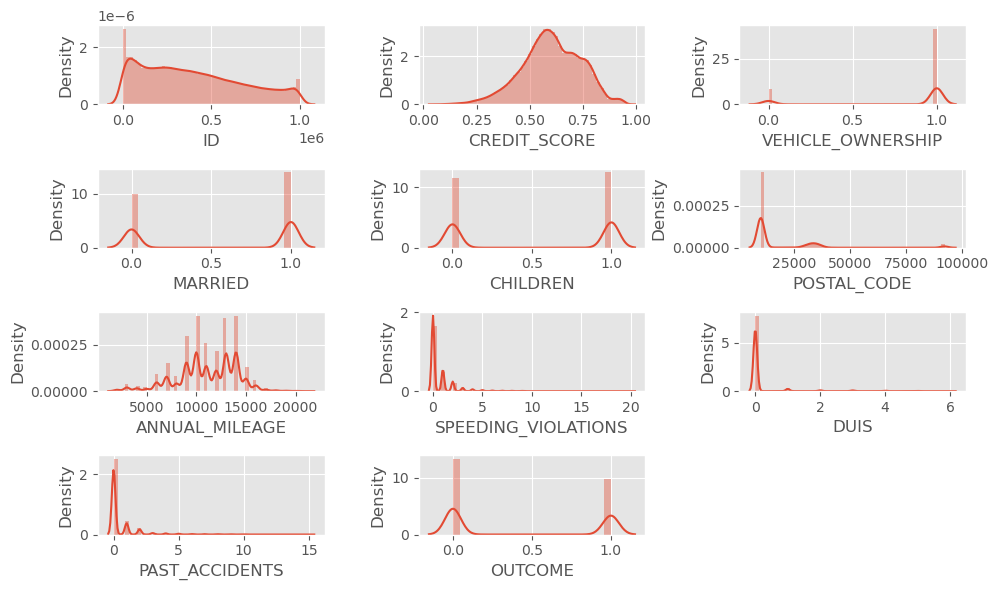

In [18]:
#for numerical columns
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
it=1
for i in df.select_dtypes(include=np.number).columns:
    plt.subplot(4,3,it)
    sns.distplot(df[i])
    it+=1
plt.tight_layout()
plt.show()


In [19]:
# comb.select_dtypes(include='object').columns

In [20]:
# for i in catcols:
#     print('\n\n------',i,'-------\n\n',)
#     print(comb[i].value_counts(normalize=True)*100)

In [21]:
for i in  df.select_dtypes(include=np.number).columns:
    print(i,'-',df[i].skew())

ID - 0.4483916257674811
CREDIT_SCORE - -0.22635846688805303
VEHICLE_OWNERSHIP - -1.729404392249637
MARRIED - -0.34144584854107923
CHILDREN - -0.0800652206959496
POSTAL_CODE - 2.9868823623140095
ANNUAL_MILEAGE - -0.5101178559817349
SPEEDING_VIOLATIONS - 3.8998165133258795
DUIS - 5.60868787463125
PAST_ACCIDENTS - 4.345520272780619
OUTCOME - 0.3118927879162741


In [22]:
# catcols=['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
#        'VEHICLE_YEAR', 'TYPE_OF_VEHICLE','VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN','SPEEDING_VIOLATIONS', 'DUIS',
#        'PAST_ACCIDENTS','POSTAL_CODE']

In [23]:
# for i in comb.columns:
#     print('\n\n',i,'\n\n')
#     print(comb[i].unique())

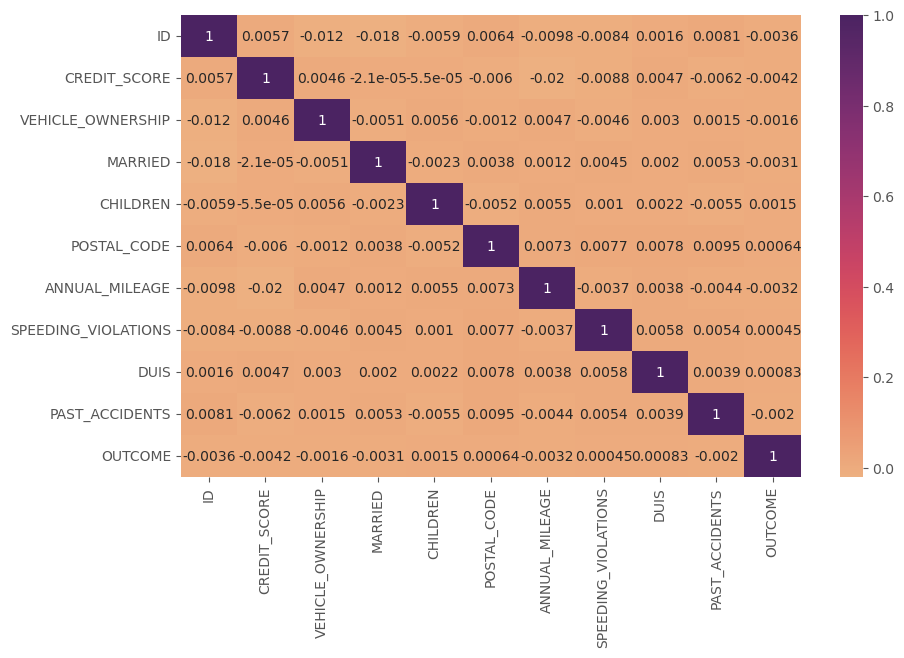

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='flare')
plt.show()

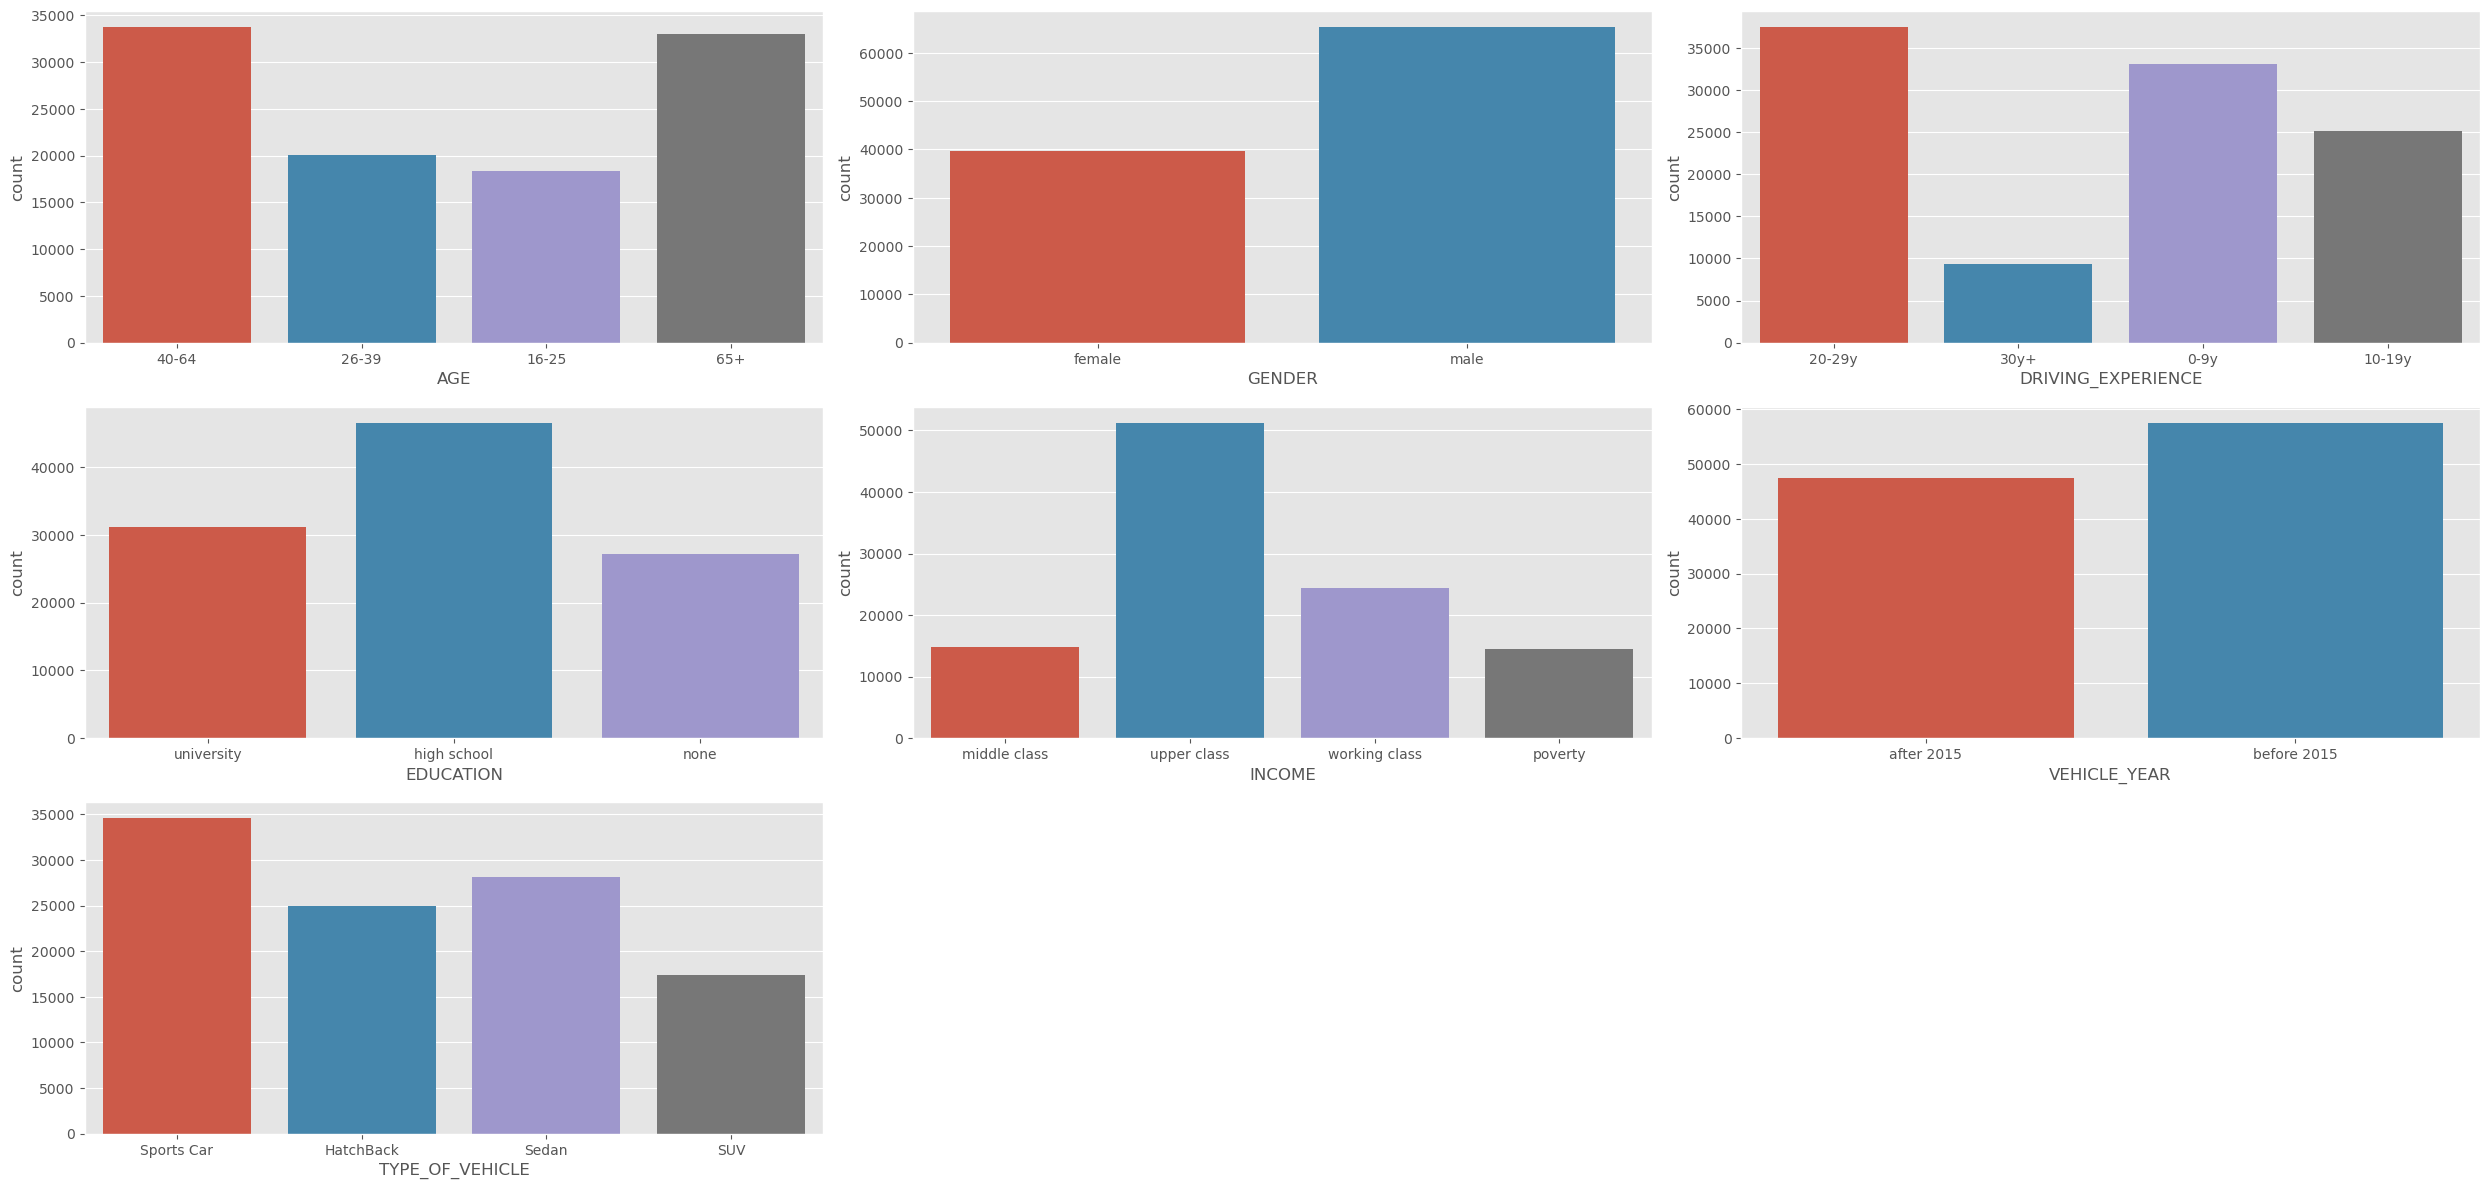

In [25]:
# Univariate analysis for categorical columns

plt.figure(figsize=(25,12))
it=1
for i in df.select_dtypes(include='O').columns:
    plt.subplot(3,3,it)
    sns.countplot(df[i])
    it+=1
plt.tight_layout()
plt.show()

In [26]:
#NUmerical columns

In [27]:
df.select_dtypes(include=np.number).columns

Index(['ID', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')

In [28]:
numcols=['CREDIT_SCORE', 'ANNUAL_MILEAGE']

In [29]:
#Categorical columns

In [30]:
df.select_dtypes(include='object').columns

Index(['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'TYPE_OF_VEHICLE'],
      dtype='object')

In [31]:
df.select_dtypes(include='object').columns

catcols=['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
      'VEHICLE_YEAR', 'TYPE_OF_VEHICLE','VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN','SPEEDING_VIOLATIONS', 'DUIS',
        'PAST_ACCIDENTS']

In [32]:
#correcting datatypes
dtc=['VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN','SPEEDING_VIOLATIONS', 'DUIS',
        'PAST_ACCIDENTS','OUTCOME']
for i in dtc:
        df[i] = df[i].astype('object')



In [33]:
df.dtypes

ID                       int64
AGE                     object
GENDER                  object
DRIVING_EXPERIENCE      object
EDUCATION               object
INCOME                  object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP       object
VEHICLE_YEAR            object
MARRIED                 object
CHILDREN                object
POSTAL_CODE              int64
ANNUAL_MILEAGE           int64
SPEEDING_VIOLATIONS     object
DUIS                    object
PAST_ACCIDENTS          object
OUTCOME                 object
TYPE_OF_VEHICLE         object
dtype: object

## Bivariate

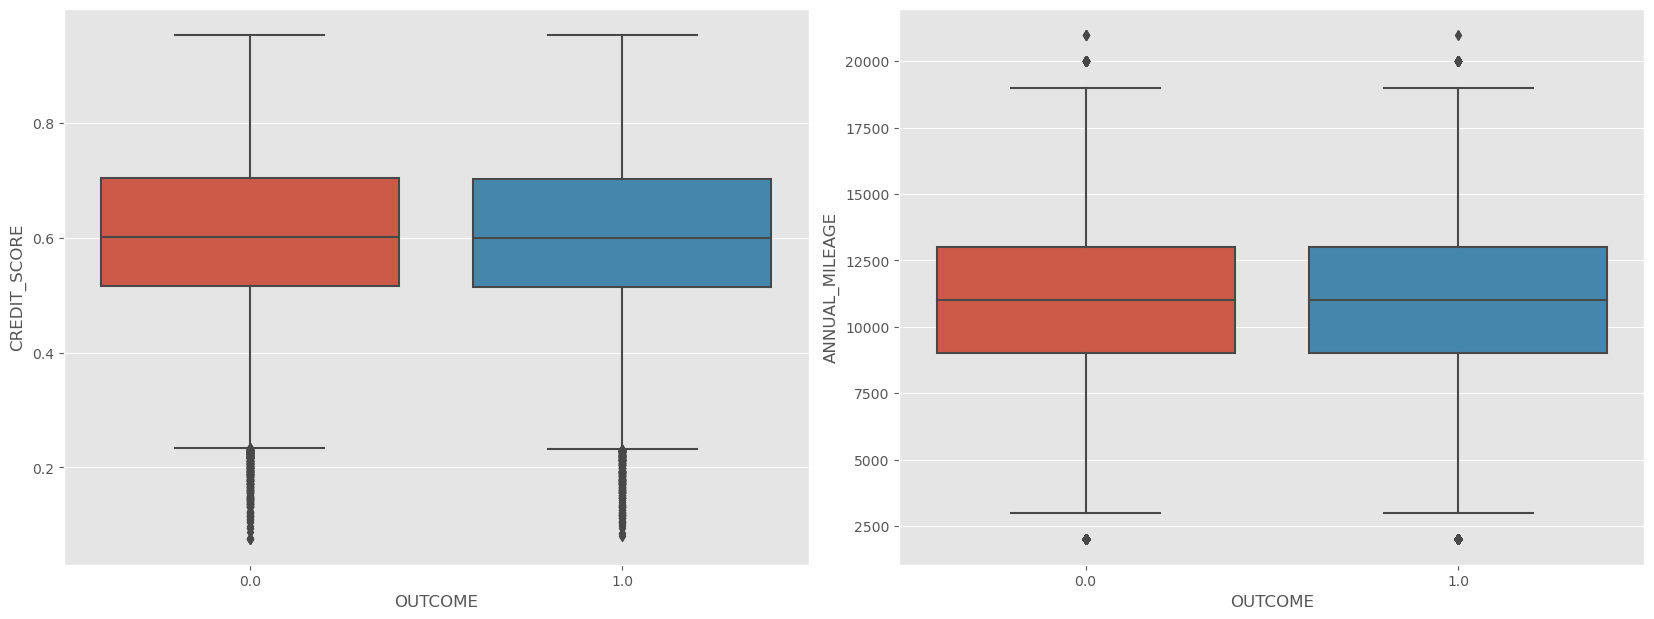

In [34]:
#num vs cat(Target)
plt.figure(figsize=(25,12))
it=1
for i in numcols:
    plt.subplot(2,3,it)
    sns.boxplot(df.OUTCOME,df[i])
    it+=1
plt.tight_layout()
plt.show()
    

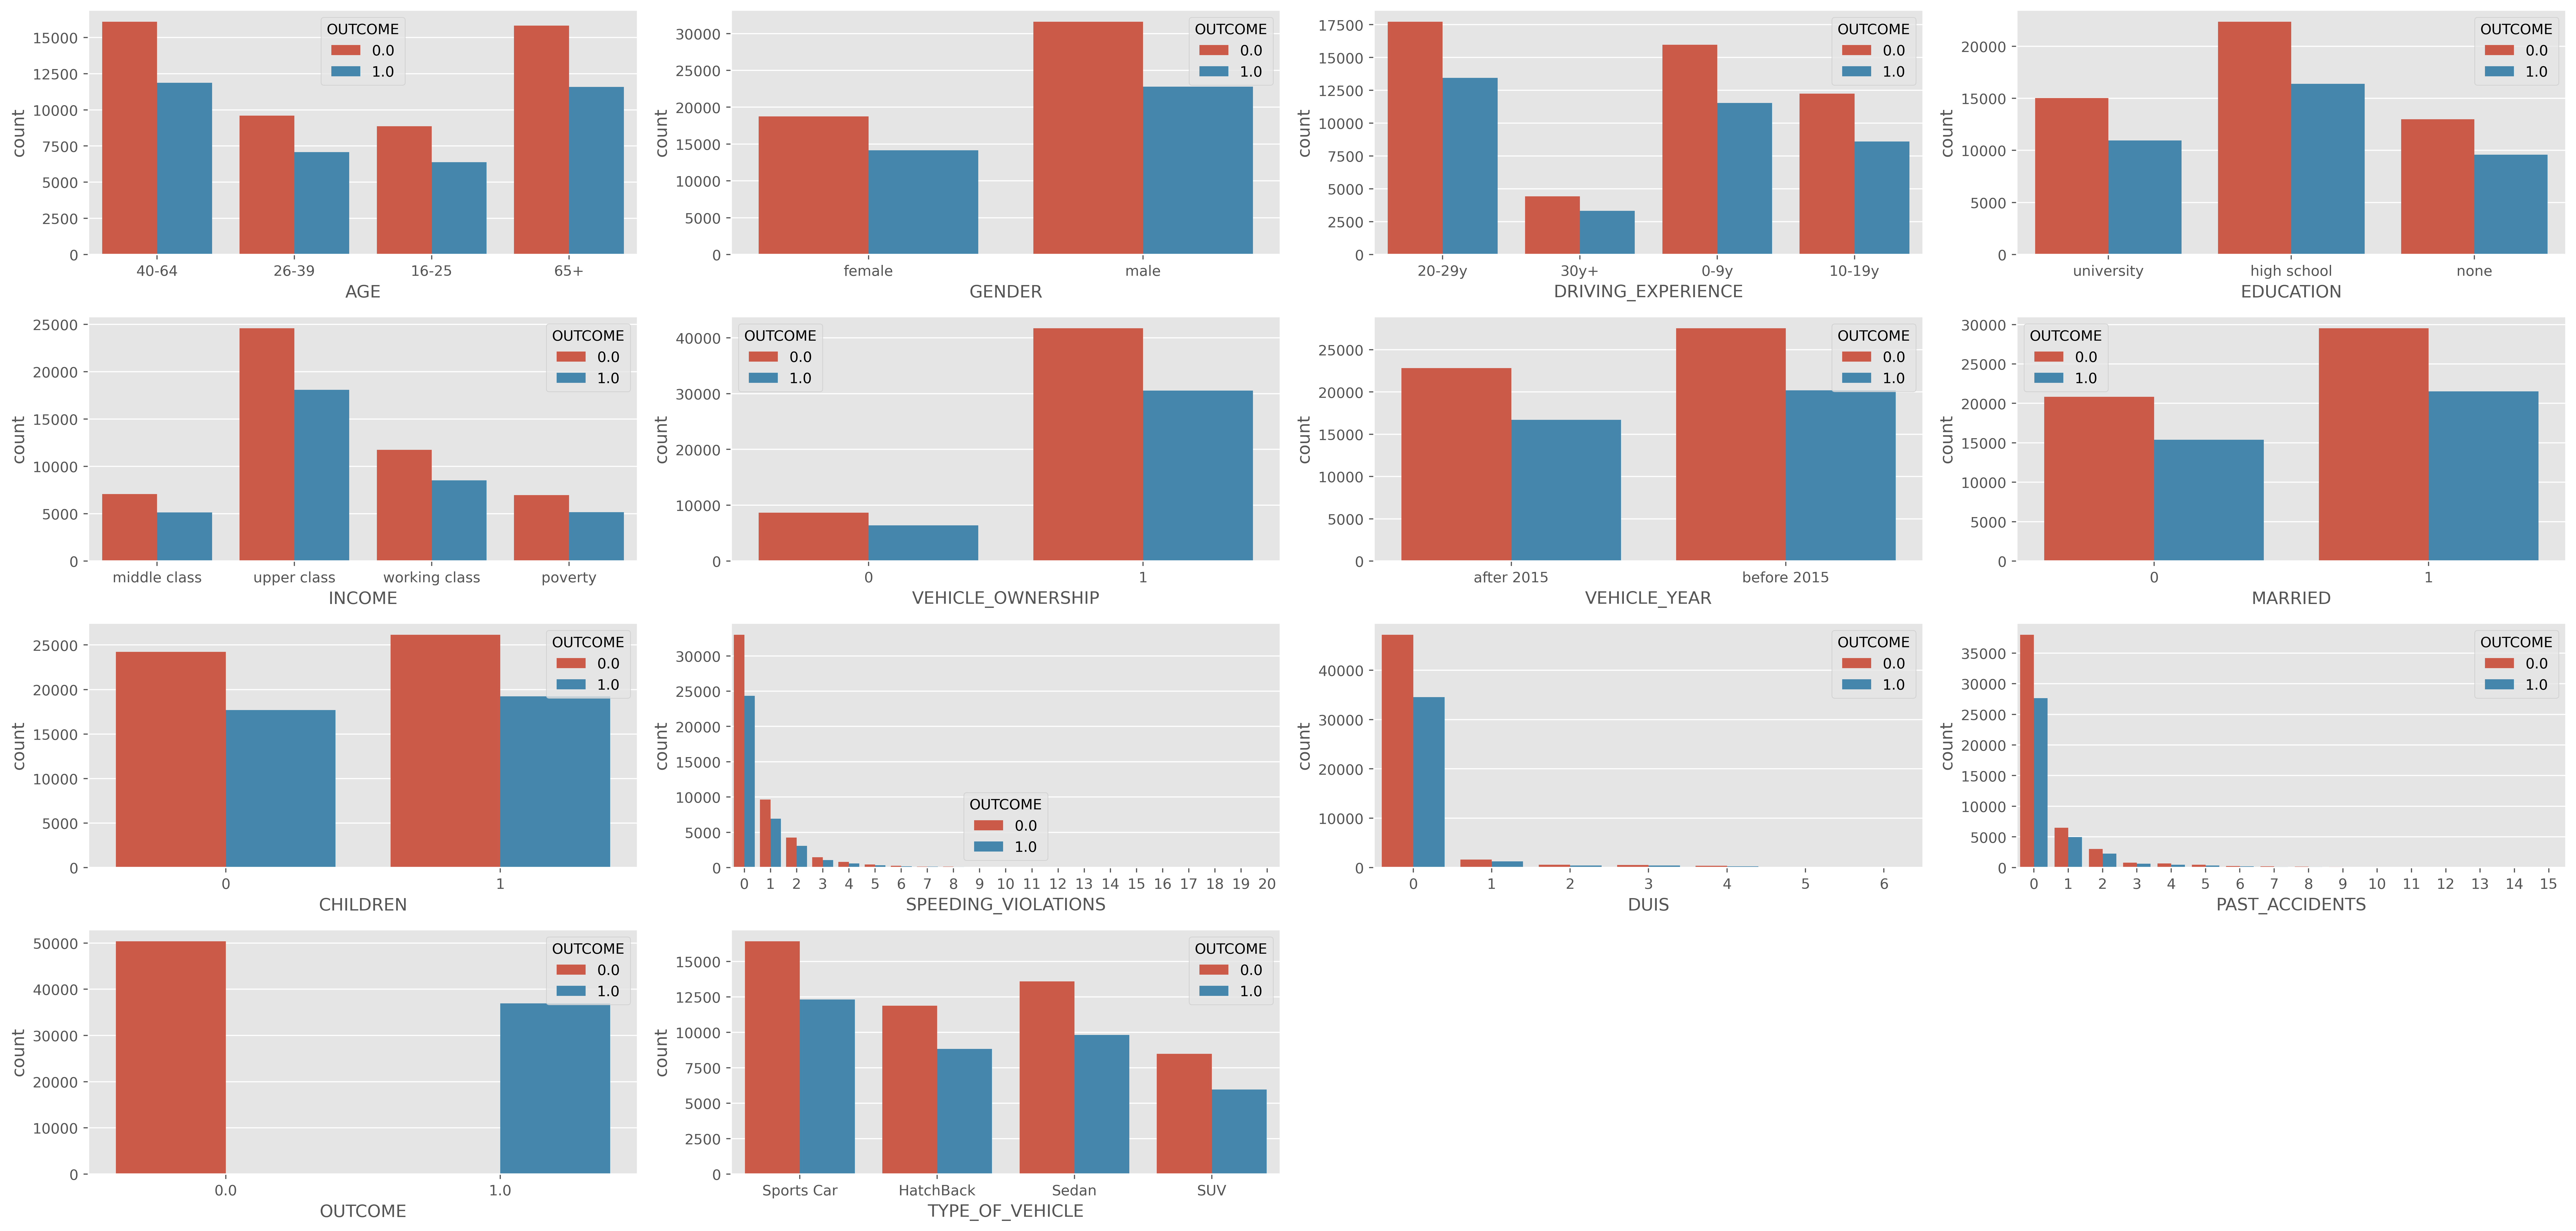

In [35]:
#cat vs cat

plt.figure(figsize=(25,12),dpi=400)
it=1
for i in df.select_dtypes(include='O').columns:
    plt.subplot(4,4,it)
    sns.countplot(df[i],hue=df.OUTCOME)
    it+=1
plt.tight_layout()
plt.show()

In [36]:
df.isnull().sum()

#no null values present in the data

ID                         0
AGE                        0
GENDER                     0
DRIVING_EXPERIENCE         0
EDUCATION                  0
INCOME                     0
CREDIT_SCORE               0
VEHICLE_OWNERSHIP          0
VEHICLE_YEAR               0
MARRIED                    0
CHILDREN                   0
POSTAL_CODE                0
ANNUAL_MILEAGE             0
SPEEDING_VIOLATIONS        0
DUIS                       0
PAST_ACCIDENTS             0
OUTCOME                17715
TYPE_OF_VEHICLE            0
dtype: int64

In [37]:
#unique values in each feature
for i in df.columns:
     print('\n\n',i,'\n\n')
     print(df[i].unique())



 ID 


[816393 251762 481952 ... 222459  83089 984879]


 AGE 


['40-64' '26-39' '16-25' '65+']


 GENDER 


['female' 'male']


 DRIVING_EXPERIENCE 


['20-29y' '30y+' '0-9y' '10-19y']


 EDUCATION 


['university' 'high school' 'none']


 INCOME 


['middle class' 'upper class' 'working class' 'poverty']


 CREDIT_SCORE 


[0.63804966 0.47574052 0.83981669 ... 0.46194201 0.48357119 0.46871045]


 VEHICLE_OWNERSHIP 


[0 1]


 VEHICLE_YEAR 


['after 2015' 'before 2015']


 MARRIED 


[0 1]


 CHILDREN 


[0 1]


 POSTAL_CODE 


[37379 10238 92099 ... 37564 37694 20934]


 ANNUAL_MILEAGE 


[11000  9000 12000  6000 15000 17000 10000 13000 16000  3000 14000  8000
  5000  7000  4000 20000  2000 18000 19000 21000]


 SPEEDING_VIOLATIONS 


[0 1 4 11 3 2 6 5 13 7 10 8 12 16 14 9 15 17 18 20 19]


 DUIS 


[0 3 1 2 4 5 6]


 PAST_ACCIDENTS 


[0 1 2 4 5 7 6 9 3 8 13 10 12 15 11 14]


 OUTCOME 


[0.0 1.0 nan]


 TYPE_OF_VEHICLE 


['Sports Car' 'HatchBack' 'Sedan' 'SUV']


In [38]:
#percentage of categories in each feature
for i in catcols:
     print('\n\n------',i,'-------\n\n',)
     print(df[i].value_counts(normalize=True)*100)



------ AGE -------


40-64    32.110476
65+      31.392381
26-39    19.064762
16-25    17.432381
Name: AGE, dtype: float64


------ GENDER -------


male      62.206667
female    37.793333
Name: GENDER, dtype: float64


------ DRIVING_EXPERIENCE -------


20-29y    35.707619
0-9y      31.534286
10-19y    23.905714
30y+       8.852381
Name: DRIVING_EXPERIENCE, dtype: float64


------ EDUCATION -------


high school    44.371429
university     29.733333
none           25.895238
Name: EDUCATION, dtype: float64


------ INCOME -------


upper class      48.829524
working class    23.289524
middle class     14.036190
poverty          13.844762
Name: INCOME, dtype: float64


------ VEHICLE_YEAR -------


before 2015    54.772381
after 2015     45.227619
Name: VEHICLE_YEAR, dtype: float64


------ TYPE_OF_VEHICLE -------


Sports Car    32.944762
Sedan         26.780952
HatchBack     23.714286
SUV           16.560000
Name: TYPE_OF_VEHICLE, dtype: float64


------ VEHICLE_OWNERSHIP -------



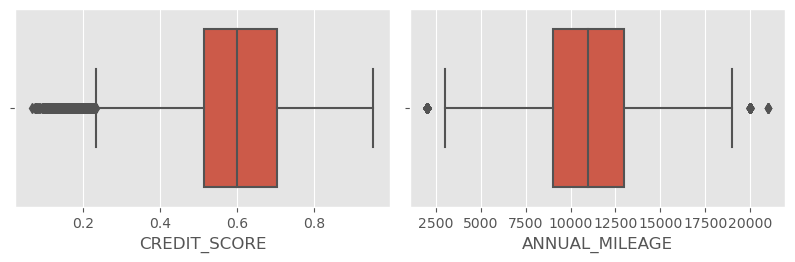

In [39]:
plt.figure(figsize=(12,10))
it=1
for i in numcols:
    plt.subplot(4,3,it)
    sns.boxplot(df[i])
    it+=1
plt.tight_layout()
plt.show()

#there are outliers present in the data 

In [40]:
df.head()

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,816393,40-64,female,20-29y,university,middle class,0.638050,0,after 2015,0,0,37379,11000,0,0,0,0.0,Sports Car
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1,before 2015,1,0,10238,9000,0,0,0,1.0,HatchBack
2,481952,40-64,male,20-29y,none,middle class,0.839817,1,before 2015,1,1,10238,12000,0,0,0,1.0,Sedan
3,3506,40-64,male,20-29y,high school,upper class,0.682527,1,before 2015,0,1,92099,6000,1,0,0,1.0,Sedan
4,498013,40-64,female,20-29y,none,working class,0.572184,1,after 2015,1,1,32122,15000,0,0,1,0.0,Sedan


##  Feature Engineering

In [41]:
# 800 to 850: Excellent
#     740 to 799: Very good
#         670 to 739: Good
#             580 to 669: Fair
#                 300 to 579: Poor

In [42]:
df['avg_mil_age']=df.groupby('AGE')['ANNUAL_MILEAGE'].transform('mean')
df['med_mil_age']=df.groupby('AGE')['ANNUAL_MILEAGE'].transform('median')
df['std_mil_age']=df.groupby('AGE')['ANNUAL_MILEAGE'].transform('std')

In [43]:
df['avg_mil_gen']=df.groupby('GENDER')['ANNUAL_MILEAGE'].transform('mean')
df['med_mil_gen']=df.groupby('GENDER')['ANNUAL_MILEAGE'].transform('median')
df['std_mil_gen']=df.groupby('GENDER')['ANNUAL_MILEAGE'].transform('std')

In [44]:
df['avg_mil_de']=df.groupby('DRIVING_EXPERIENCE')['ANNUAL_MILEAGE'].transform('mean')
df['med_mil_de']=df.groupby('DRIVING_EXPERIENCE')['ANNUAL_MILEAGE'].transform('median')
df['std_mil_de']=df.groupby('DRIVING_EXPERIENCE')['ANNUAL_MILEAGE'].transform('std')

In [45]:
df['avg_mil_ed']=df.groupby('EDUCATION')['ANNUAL_MILEAGE'].transform('mean')
df['med_mil_ed']=df.groupby('EDUCATION')['ANNUAL_MILEAGE'].transform('median')
df['std_mil_ed']=df.groupby('EDUCATION')['ANNUAL_MILEAGE'].transform('std')

In [46]:
df['avg_mil_in']=df.groupby('INCOME')['ANNUAL_MILEAGE'].transform('mean')
df['med_mil_in']=df.groupby('INCOME')['ANNUAL_MILEAGE'].transform('median')
df['std_mil_in']=df.groupby('INCOME')['ANNUAL_MILEAGE'].transform('std')

In [47]:
df['avg_cred_in']=df.groupby('INCOME')['CREDIT_SCORE'].transform('mean')
df['med_cred_in']=df.groupby('INCOME')['CREDIT_SCORE'].transform('median')
df['std_cred_in']=df.groupby('INCOME')['CREDIT_SCORE'].transform('std')

In [48]:
df['avg_cred_ed']=df.groupby('EDUCATION')['CREDIT_SCORE'].transform('mean')
df['med_cred_ed']=df.groupby('EDUCATION')['CREDIT_SCORE'].transform('median')
df['std_cred_ed']=df.groupby('EDUCATION')['CREDIT_SCORE'].transform('std')

In [49]:
df['avg_cred_cr']=df.groupby('DRIVING_EXPERIENCE')['CREDIT_SCORE'].transform('mean')
df['med_cred_cr']=df.groupby('DRIVING_EXPERIENCE')['CREDIT_SCORE'].transform('median')
df['std_cred_cr']=df.groupby('DRIVING_EXPERIENCE')['CREDIT_SCORE'].transform('std')

In [50]:
df['avg_cred_gen']=df.groupby('GENDER')['CREDIT_SCORE'].transform('mean')
df['med_cred_gen']=df.groupby('GENDER')['CREDIT_SCORE'].transform('median')
df['std_cred_gen']=df.groupby('GENDER')['CREDIT_SCORE'].transform('std')

In [51]:
df['avg_mil_tv']=df.groupby('TYPE_OF_VEHICLE')['ANNUAL_MILEAGE'].transform('mean')
df['med_mil_tv']=df.groupby('TYPE_OF_VEHICLE')['ANNUAL_MILEAGE'].transform('median')
df['std_mil_tv']=df.groupby('TYPE_OF_VEHICLE')['ANNUAL_MILEAGE'].transform('std')

In [52]:
df['avg_mil_de']=df.groupby('DRIVING_EXPERIENCE')['ANNUAL_MILEAGE'].transform('mean')
df['med_mil_de']=df.groupby('DRIVING_EXPERIENCE')['ANNUAL_MILEAGE'].transform('median')
df['std_mil_de']=df.groupby('DRIVING_EXPERIENCE')['ANNUAL_MILEAGE'].transform('std')

In [53]:
df['avg_cred_tv']=df.groupby('TYPE_OF_VEHICLE')['CREDIT_SCORE'].transform('mean')
df['med_cred_tv']=df.groupby('TYPE_OF_VEHICLE')['CREDIT_SCORE'].transform('median')
df['std_cred_tv']=df.groupby('TYPE_OF_VEHICLE')['CREDIT_SCORE'].transform('std')

In [54]:
df["count_PC"] = df.groupby("AGE")["POSTAL_CODE"].transform("nunique")

In [55]:
df['VEHICLE_OWNERSHIP'] = df['VEHICLE_OWNERSHIP'].astype('O')
df['CHILDREN'] = df['CHILDREN'].astype('O')
df['MARRIED'] = df['MARRIED'].astype('O')

In [56]:
df.AGE = np.where(df.AGE=='65+','65-65',df.AGE)
df.AGE = (df.AGE.str.split('-',expand=True)[0].astype(np.number) + df.AGE.str.split('-',expand=True)[1].astype(np.number))/2

In [57]:
df.DRIVING_EXPERIENCE = df.DRIVING_EXPERIENCE.str.split('y',expand=True)[0]
df.DRIVING_EXPERIENCE = np.where(df.DRIVING_EXPERIENCE=='30','30-30',df.DRIVING_EXPERIENCE)
df.DRIVING_EXPERIENCE = (df.DRIVING_EXPERIENCE.str.split('-',expand=True)[0].astype(np.number) + \
                         df.DRIVING_EXPERIENCE.str.split('-',expand=True)[1].astype(np.number))/2

In [58]:
df.SPEEDING_VIOLATIONS = np.where(df.SPEEDING_VIOLATIONS==0,0,1)
df.SPEEDING_VIOLATIONS = df.SPEEDING_VIOLATIONS.astype('O')

In [59]:
df.DUIS = np.where(df.DUIS==0,0,1)
df.DUIS = df.DUIS.astype('O')

In [60]:
df.PAST_ACCIDENTS = np.where(df.PAST_ACCIDENTS==0,0,1)
df.PAST_ACCIDENTS = df.PAST_ACCIDENTS.astype('O')

In [61]:
df['ANNUAL_MILEAGE_BIN'] = pd.cut(df['ANNUAL_MILEAGE'],[1000,6000,11000,16000,22000])


In [62]:
df['SPEEDING_VIOLATIONS_BIN'] = pd.cut(df['SPEEDING_VIOLATIONS'],[-1,1,4,21])


In [60]:
df['DUIS_BIN'] = pd.cut(df['DUIS'],[-1,1,2,7])


In [63]:
df['CREDIT_SCORE_BIN'] = pd.cut(df['CREDIT_SCORE'],[-1,0.25,0.5,0.75,1.1])


In [62]:
df['PAST_ACCIDENTS_BIN'] = pd.cut(df['PAST_ACCIDENTS'],[-1,1,4,16])


#### Statistical test

In [64]:
#Average Miles Driven per Year Based on Gender

In [65]:
# #Test for Cat vs cat
# import scipy.stats as stats
# for i in catcols:
#     tb1=pd.crosstab(newdf[i],newdf['OUTCOME'])
#     t,pvalue,_,_=stats.chi2_contingency(tb1)
#     print('\n\n',i,'\n')
#     print('pvalue :',pvalue)
#     print('--------------')
#     if pvalue<0.05:
#         print(i,' is significant')
#     else:
#         print(i,' is not significant')

In [66]:
# GENDER, DUIS, TYPE_OF_VEHICLE and DRIVING_EXPERIENCE  are statistically significant

In [67]:
df.drop(columns=['ID','POSTAL_CODE','CREDIT_SCORE'],axis=1,inplace=True)

### Train test split

In [68]:
from sklearn.model_selection import train_test_split
train = df[df.OUTCOME.notnull()]
test  = df[df.OUTCOME.isnull()]
xtrain,ytrain = train.drop('OUTCOME',axis=1),train.OUTCOME.astype(int)
xtest = test.drop('OUTCOME',axis=1)

In [69]:
#scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

for i in xtrain.select_dtypes(include=np.number).columns:
    xtrain[i]=sc.fit_transform(pd.DataFrame(xtrain[i]))
    xtest[i]=sc.transform(pd.DataFrame(xtest[i]))

In [70]:
for i in xtrain.select_dtypes(exclude=np.number).columns:
    xtrain[i] = pd.factorize(xtrain[i])[0]
    xtest[i] = pd.factorize(xtest[i])[0]

<AxesSubplot:ylabel='OUTCOME'>

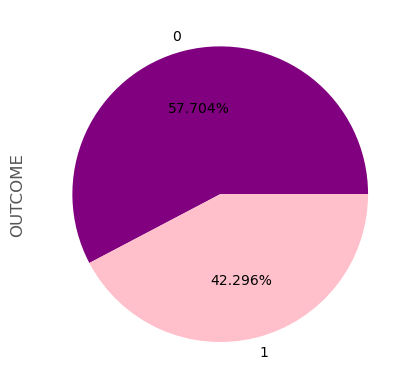

In [71]:
ytrain.value_counts(normalize=True).plot(kind='pie',colors=['purple','pink'],autopct='%.3f%%')

In [72]:
#balancing the target variable for better prediction 

from imblearn.over_sampling import SMOTE

xtrain,ytrain = SMOTE().fit_resample(xtrain,ytrain)

<AxesSubplot:ylabel='OUTCOME'>

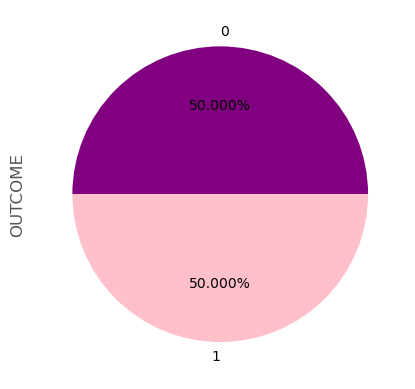

In [73]:
ytrain.value_counts(normalize=True).plot(kind='pie',colors=['purple','pink'],autopct='%.3f%%')

In [74]:
# df.drop(['ANNUAL_MILEAGE','SPEEDING_VIOLATIONS','DUIS','PAST_ACCIDENTS','CREDIT_SCORE'],axis=1, inplace = True)

In [75]:
df

,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,...,avg_mil_tv,med_mil_tv,std_mil_tv,avg_cred_tv,med_cred_tv,std_cred_tv,count_PC,ANNUAL_MILEAGE_BIN,SPEEDING_VIOLATIONS_BIN,CREDIT_SCORE_BIN
0,52.0,female,24.5,university,middle class,0,after 2015,0,0,11000,...,11069.264570,11000.0,2962.448151,0.603166,0.602154,0.137993,5797,"(6000, 11000]","(-1, 1]","(0.5, 0.75]"
1,32.5,male,24.5,high school,middle class,1,before 2015,1,0,9000,...,11051.004016,11000.0,2984.498990,0.600555,0.600076,0.138044,3959,"(6000, 11000]","(-1, 1]","(0.25, 0.5]"
2,52.0,male,24.5,none,middle class,1,before 2015,1,1,12000,...,11067.923186,11000.0,2973.921209,0.602503,0.600702,0.138161,5797,"(11000, 16000]","(-1, 1]","(0.75, 1.1]"
3,52.0,male,24.5,high school,upper class,1,before 2015,0,1,6000,...,11067.923186,11000.0,2973.921209,0.602503,0.600702,0.138161,5797,"(1000, 6000]","(-1, 1]","(0.5, 0.75]"
4,52.0,female,24.5,none,working class,1,after 2015,1,1,15000,...,11067.923186,11000.0,2973.921209,0.602503,0.600702,0.138161,5797,"(11000, 16000]","(-1, 1]","(0.5, 0.75]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,65.0,female,4.5,high school,upper class,1,before 2015,0,0,9000,...,11049.056821,11000.0,2972.247107,0.601980,0.600839,0.137955,5618,"(6000, 11000]","(-1, 1]","(0.5, 0.75]"
104996,52.0,female,4.5,none,working class,1,after 2015,1,0,10000,...,11067.923186,11000.0,2973.921209,0.602503,0.600702,0.138161,5797,"(6000, 11000]","(-1, 1]","(0.5, 0.75]"
104997,20.5,male,14.5,none,upper class,1,after 2015,1,0,11000,...,11067.923186,11000.0,2973.921209,0.602503,0.600702,0.138161,3541,"(6000, 11000]","(-1, 1]","(0.25, 0.5]"
104998,52.0,female,24.5,high school,working class,1,before 2015,0,0,10000,...,11051.004016,11000.0,2984.498990,0.600555,0.600076,0.138044,5797,"(6000, 11000]","(-1, 1]","(0.25, 0.5]"


In [76]:
#### MODEL BUILDING

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [92]:
# Import more libraries...
from sklearn.model_selection import cross_val_score, StratifiedKFold

def base_models():
    models = dict()
    models['lg'] = LogisticRegression()
    models["tree"] = DecisionTreeClassifier(criterion='entropy')
    models['rf'] = RandomForestClassifier(criterion='entropy')
    models['gbm'] = GradientBoostingClassifier()
    models['xgb'] = XGBClassifier()
    models['lgbm'] = LGBMClassifier()
    models["catboost"] = CatBoostClassifier()
    models['NB']=GaussianNB()
    return models

In [93]:
# Evaluation Function...
from sklearn.metrics import f1_score
def eval_score(model):
    cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
    score = cross_val_score(model, xtrain, ytrain, 
                           scoring = "roc_auc", 
                            cv = cv, error_score="raise",
                           n_jobs = -1)
    return score

In [94]:
# Build the Models....
models = base_models()
result, names = list(), list()
for name, model in models.items():
    finalscore = eval_score(model)
    result.append(finalscore)
    names.append(name)
    print('%s %.3f (%.3f)'% (name, np.mean(result), np.std(result)))

lg 0.558 (0.004)
tree 0.565 (0.007)
rf 0.587 (0.032)
gbm 0.593 (0.030)
xgb 0.597 (0.028)
lgbm 0.600 (0.027)
catboost 0.603 (0.025)
NB 0.596 (0.029)


In [105]:
xgb = LGBMClassifier()
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

pred_xgb = []
for i, j in kfold.split(xtrain,ytrain):
    xtr,ytr,xte,yte = xtrain.loc[i],ytrain[i],xtrain.loc[j],ytrain[j]
    m= stack.fit(xtr,ytr)
    predlgb.append(m.predict(xtest))

In [97]:
pd.DataFrame(predlgb).T.mode(axis=1)[0]

0        1
1        1
2        1
3        1
4        1
        ..
17710    1
17711    0
17712    0
17713    1
17714    1
Name: 0, Length: 17715, dtype: int32

In [98]:
pred24= pd.DataFrame(predlgb).T.mode(axis=1)[0]

In [99]:
subm.OUTCOME = pred24

In [102]:
subm.to_csv("lgbmf26.csv",index=False)

In [103]:
cd

C:\Users\KRITGYA KASHYAP
